In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file_path = '/Users/manu/Documents/road_accidents.csv'
file_path2 = '/Users/manu/Documents/miles_driven.csv'
miles_driven = pd.read_csv(file_path2, delimiter = '|')
road_accidents_data = pd.read_csv(file_path, skiprows = 9, delimiter = '|')

In [3]:

with open(file_path) as f:
    for line in iter(lambda: f.readline().rstrip(), '##### DATA BEGIN #####'):
        print(line)
f.close()


##### LICENSE #####
# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)
# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)
##### COLUMN ABBREVIATIONS #####
# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)
# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)
# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)
# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)


In [4]:
miles_driven.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [5]:
road_accidents_data.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [6]:
road_accidents_data.info()
miles_driven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [7]:
road_accidents_data.describe() #outliers in perc_fatl_speed

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


In [8]:
miles_driven.describe() #outliers

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


## Missing Values

In [9]:
road_accidents_data.isna().sum()

state                   0
drvr_fatl_col_bmiles    0
perc_fatl_speed         0
perc_fatl_alcohol       0
perc_fatl_1st_time      0
dtype: int64

In [10]:
miles_driven.isna().sum()

state                     0
million_miles_annually    0
dtype: int64

In [11]:
road_accidents_data.shape

(51, 5)

In [12]:
miles_driven.shape

(51, 2)

array([[<AxesSubplot:title={'center':'drvr_fatl_col_bmiles'}>,
        <AxesSubplot:title={'center':'perc_fatl_speed'}>],
       [<AxesSubplot:title={'center':'perc_fatl_alcohol'}>,
        <AxesSubplot:title={'center':'perc_fatl_1st_time'}>]],
      dtype=object)

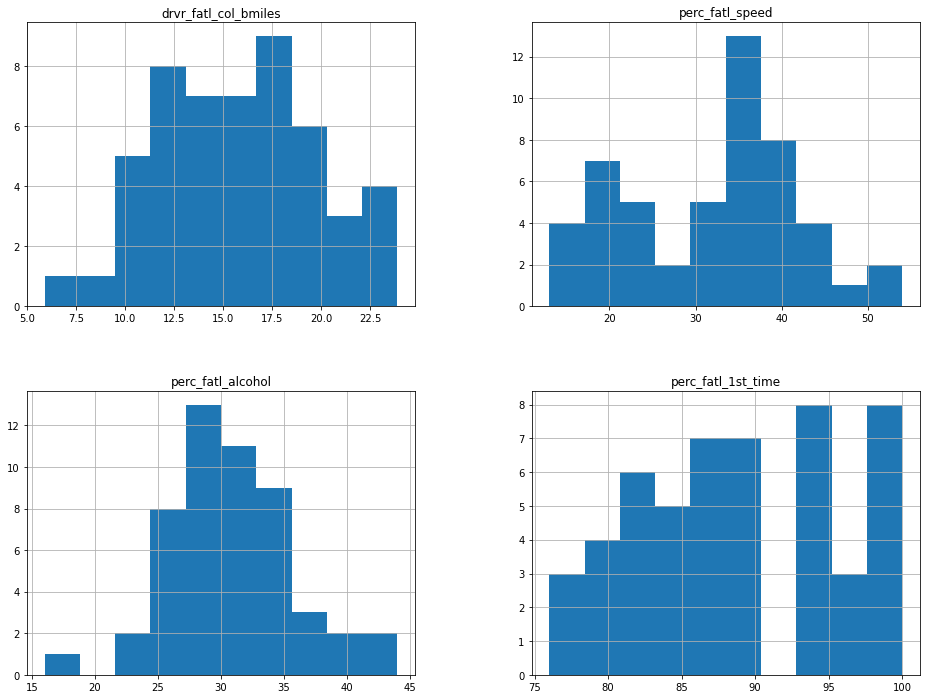

In [13]:
road_accidents_data.hist(bins=10, figsize=(16,12))

array([[<AxesSubplot:title={'center':'million_miles_annually'}>]],
      dtype=object)

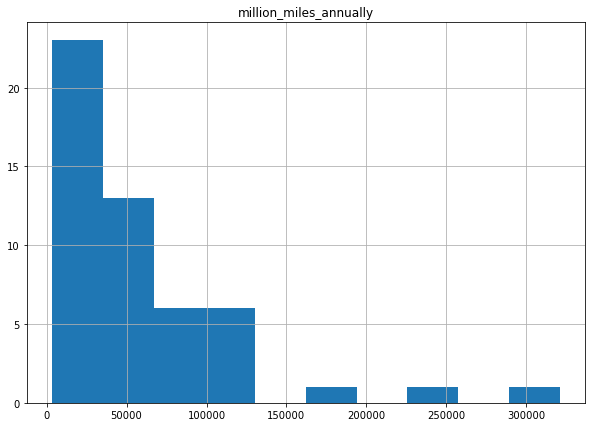

In [14]:
miles_driven.hist(bins=10, figsize=(10,7))

## Correlation 

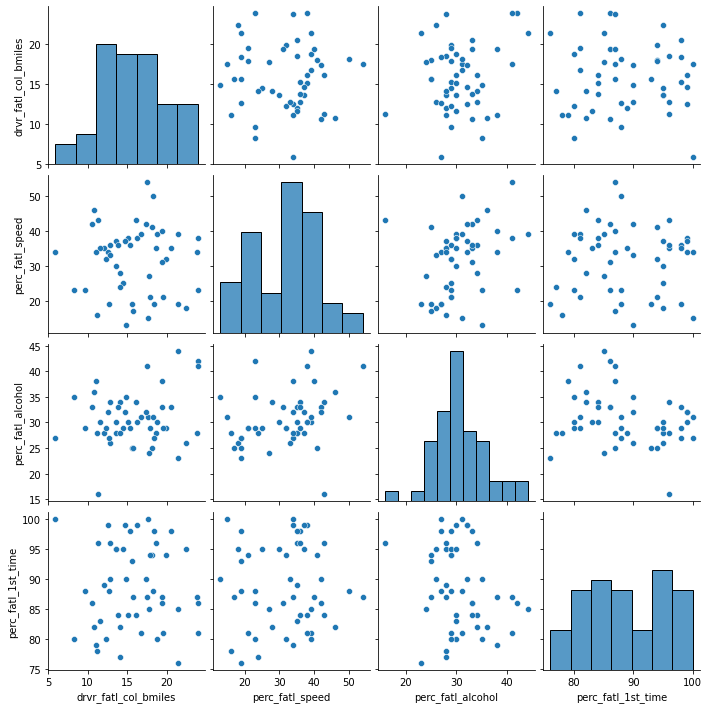

In [15]:
sns.pairplot(road_accidents_data)

<AxesSubplot:>

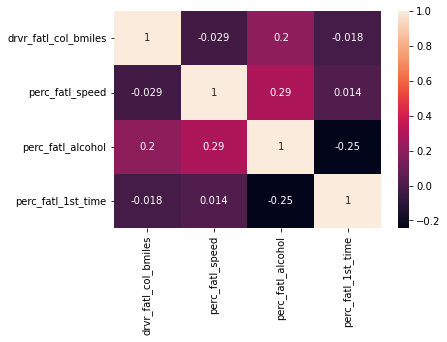

In [16]:
sns.heatmap(road_accidents_data.corr(), annot=True)

In [28]:

X = road_accidents_data.iloc[:, 2:5]
y = road_accidents_data['drvr_fatl_col_bmiles']

In [29]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)


In [30]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,y_train)
coefficeint_df = pd.DataFrame()
coefficeint_df["Column_Name"] = X.columns
coefficeint_df['Coefficient_Value'] = pd.Series(regr.coef_)
print(coefficeint_df)
print(regr.coef_)

          Column_Name  Coefficient_Value
0     perc_fatl_speed          -0.014559
1   perc_fatl_alcohol           0.165498
2  perc_fatl_1st_time          -0.058668
[-0.01455922  0.16549845 -0.05866844]


# scaling data

In [31]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[-9.14301314e-17 -2.34017598e-16  8.83824604e-16]
[1. 1. 1.]


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

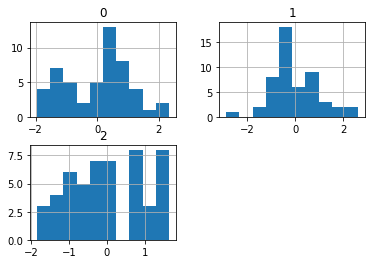

In [32]:
s = pd.DataFrame(X_scaled)

s.hist(bins=10)


# PCA

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
#plot = plt.scatter(Xt[:,0], Xt[:,3], c=y)
#plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
#plt.show()

PCA()

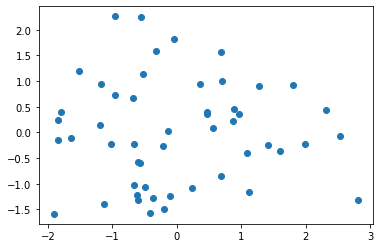

In [36]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(X_scaled)
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]
plt.scatter(p_comp1,p_comp2)

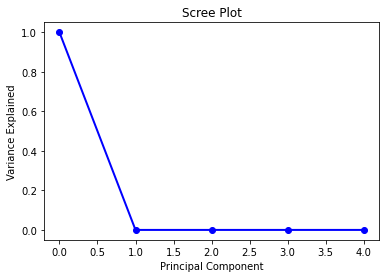

In [80]:
PC_values = np.arange(pca.n_components_) 
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

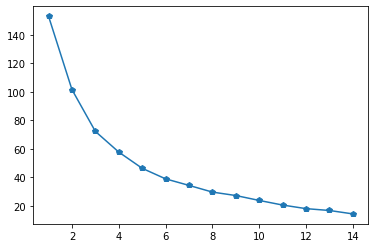

In [38]:
 
from sklearn.cluster import KMeans

ks = range(1, 15)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=10)
    km.fit_transform(X_scaled)
    inertias.append(km.inertia_)
    
plt.plot(list(ks), inertias, marker='p')

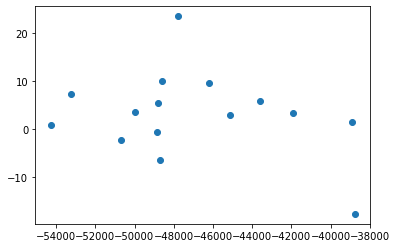

In [75]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = Xt[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

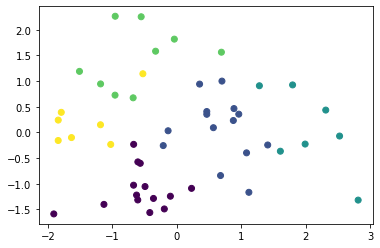

In [43]:
km = KMeans(n_clusters=5, random_state=10)
km.fit(X_scaled)
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)
road_accidents_data['cluster'] =km.labels_

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time    cluster  million_miles_annually  \
count            51.00000  51.000000               51.000000   
mean             88.72549   1.627451            57851.019608   
std               6.96011   1.413659            59898.414088   
min              76.00000   0.000000             3568.000000   
25%              83.50000   0.000000            17450.000000   
50%         

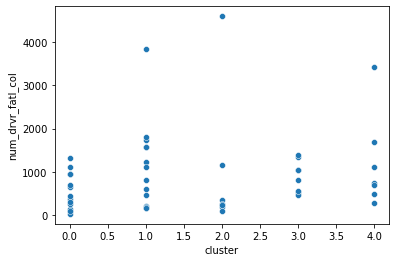

In [44]:
car_acc_miles = pd.merge(road_accidents_data, miles_driven, on='state')
car_acc_miles['num_drvr_fatl_col']=(car_acc_miles['drvr_fatl_col_bmiles']/1000)*car_acc_miles['million_miles_annually']
sns.scatterplot(x=car_acc_miles['cluster'], y=car_acc_miles['num_drvr_fatl_col'], data=car_acc_miles, estimator=sum, ci=None)
print(car_acc_miles.describe())
count_mean_sum = car_acc_miles.groupby('cluster').num_drvr_fatl_col.agg(['count','mean','sum'])
print(count_mean_sum)